# Data ScienceProject: PREDICTING AVOCADO PRICES USING FACEBOOK PROPHET and plot Graph

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet # Prophet used for forcasting and planning 
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import interactive


In [2]:
# dataframes creation for both training and testing datasets 
url = 'https://raw.githubusercontent.com/erumshabir/project/master/notebooks/avocado.csv'
avocado_df = pd.read_csv(url, error_bad_lines=False)  

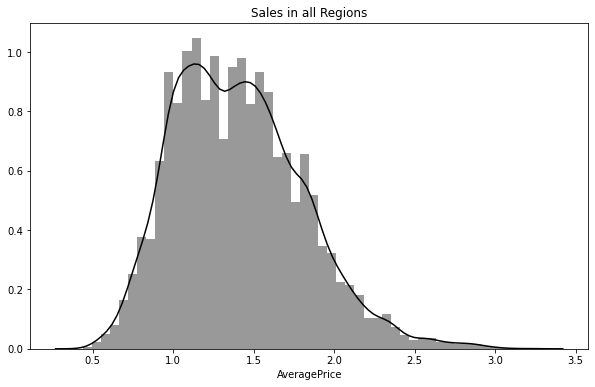

In [11]:
avocado_df = avocado_df.sort_values("Date")
plt.figure(figsize=(10,6))
plt.title("Sales in all Regions")
sns.distplot(avocado_df["AveragePrice"], color = 'black')

In [5]:
avocado_df = avocado_df.sort_values("Date")


In [6]:
#PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']] 
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

Button(description='View predicted sales', style=ButtonStyle())

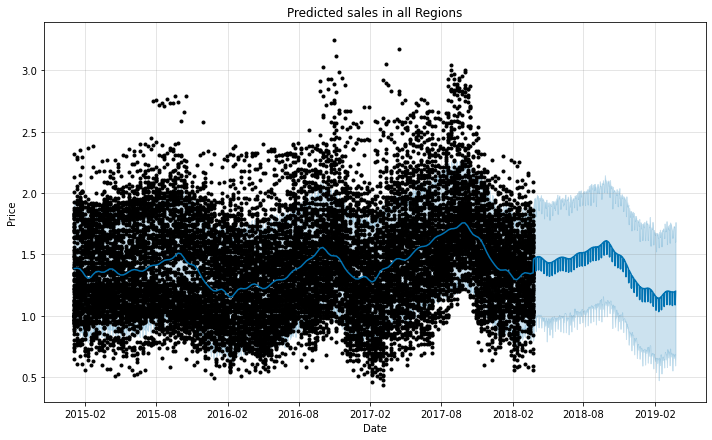

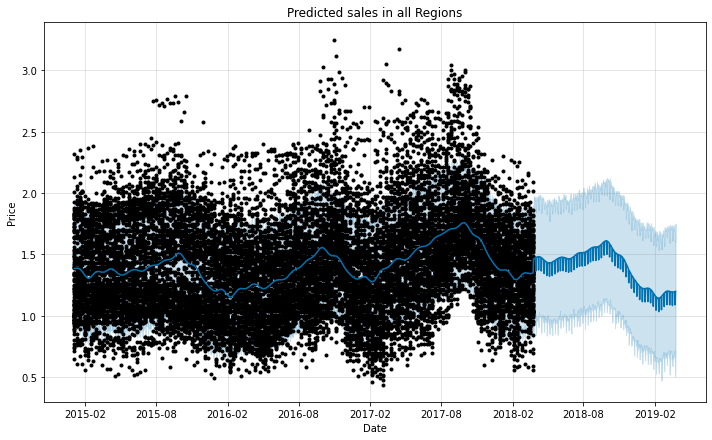

In [9]:
btn = widgets.Button(description='View predicted sales')
display(btn)
def btn_eventhandler(obj):
    widgets.Text(value='Displaying ', disabled=True)
    m = Prophet(weekly_seasonality=True,daily_seasonality=True)
    m.fit(avocado_prophet_df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    figure = m.plot(forecast, xlabel='Date', ylabel='Price')
    plt.title("Predicted sales in all Regions")
btn.on_click(btn_eventhandler)

In [10]:
avocado_df1 = pd.read_csv('avocado.csv')

def selectRegion(Region):
    avocado_df_sample = avocado_df1[avocado_df1['region']==Region]
    avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})
    m = Prophet(daily_seasonality=True, weekly_seasonality=True)
    m.fit(avocado_df_sample)
    # Forcasting into the future
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    figure = m.plot(forecast, xlabel='Date', ylabel='Price')
    plt.title("Predicted sales in: "+Region)
reg=[ 'Albany', 'Atlanta', 'BaltimoreWashington','Boise','BuffaloRochester','California','Charlotte','Chicago','CincinnatiDayton','Columbus','DallasFtWorth','Denve','Detroit','GrandRapids','GreatLakes','HarrisburgScranton','HartfordSpringfield','Houston','Indianapolis','Jacksonville','LasVegas','LosAngeles','Louisville','MiamiFtLauderdale','Midsouth','Nashville','NewOrleansMobile','NewYork','Northeast','NorthernNewEngland','Orlando','Philadelphia','PhoenixTucson','Pittsburgh','Plains','Portland','RaleighGreensboro','RichmondNorfolk','Roanoke','Sacramento','SanDiego','SanFrancisco','Seattle','SouthCarolina','SouthCentral','Southeast','Spokane','StLouis','Syracuse','Tampa','TotalUS','West','WestTexNewMexico']         
interactive(selectRegion,Region=reg)

interactive(children=(Dropdown(description='Region', options=('Albany', 'Atlanta', 'BaltimoreWashington', 'Boi…